In [1]:
!pip install "numpy<2.0"
!pip install --upgrade mediapipe
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached sentencepiece-0.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 29.4 MB/s eta 0:00:0031m29.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.15
    Uninstalling mediapipe-0.10.15:
      Successfully uninstalled mediapipe-0.10.15

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    if image is None:
        print("Empty image received in mediapipe_detection")
        return None, None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color conversion
    image.flags.writeable = False                 # Image is no longer writable
    results = model.process(image)                # Make prediction
    image.flags.writeable = True                  # image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color conversion
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [6]:
def draw_styled_landmarks(image, results):
    if results:
        # Draw Face Landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
            )
        # Draw Pose Landmarks
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
            )
        # Draw Left Hand Landmarks
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
            )
        # Draw Right Hand Landmarks
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
            )


In [21]:
cv2.startWindowThread()

#if no popup, try 1 or 2
cap = cv2.VideoCapture(0)

# Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read Feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw Landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

I0000 00:00:1731375240.357286 12124957 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1 Pro
W0000 00:00:1731375240.442030 12125584 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375240.456904 12125584 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375240.458736 12125587 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375240.458899 12125583 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375240.459515 12125586 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disablin

In [22]:
draw_landmarks(frame, results)

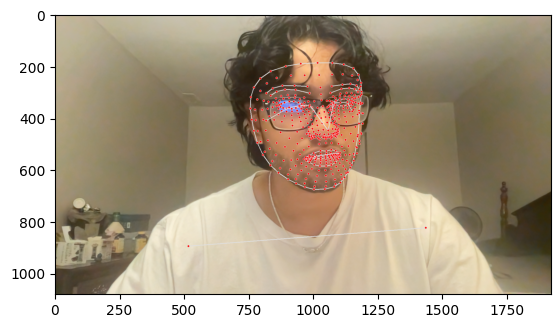

In [23]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [24]:
# 3. Extract Keypoint Values

In [25]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [26]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [27]:
def extract_keypoints(results):
    # Initialize empty arrays for landmarks with zeros
    pose = np.zeros(132)     # 33 landmarks * 4 (x, y, z, visibility)
    face = np.zeros(1404)    # 468 landmarks * 3 (x, y, z)
    lh = np.zeros(63)        # 21 landmarks * 3 (x, y, z)
    rh = np.zeros(63)        # 21 landmarks * 3 (x, y, z)

    # Extract pose landmarks if detected
    if results.pose_landmarks:
        pose_landmarks = results.pose_landmarks.landmark
        pose = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose_landmarks]).flatten()

    # Extract face landmarks if detected
    if results.face_landmarks:
        face_landmarks = results.face_landmarks.landmark
        face = np.array([[lm.x, lm.y, lm.z] for lm in face_landmarks]).flatten()

    # Extract left hand landmarks if detected
    if results.left_hand_landmarks:
        lh_landmarks = results.left_hand_landmarks.landmark
        lh = np.array([[lm.x, lm.y, lm.z] for lm in lh_landmarks]).flatten()

    # Extract right hand landmarks if detected
    if results.right_hand_landmarks:
        rh_landmarks = results.right_hand_landmarks.landmark
        rh = np.array([[lm.x, lm.y, lm.z] for lm in rh_landmarks]).flatten()

    # Concatenate all arrays
    keypoints = np.concatenate([pose, face, lh, rh])
    return keypoints


In [28]:
extract_keypoints(results)

array([ 0.54957122,  0.41617459, -1.14492726, ...,  0.        ,
        0.        ,  0.        ])

In [29]:
# 4. Setup Folders for Collection
# DATA COLLECTION
# Maybe try putting this and 5 in a seperate file just for collecting data

In [40]:
#Path for exported data, np arrays
#Try to go to this path and find the files, then add more
DATA_PATH = os.path.join("MP_Data")
#Actions to try and detect
####### ADD TO THIS EXTRA SIGNS YOU WANT TO ADD
####### THEN ONCE DONE TRAINING ADD ALL DATA TO GITHUB
####### IF TRAINING DATA IS BAD DELETE MP_DATA FOLDER AND RE-RUN THIS BLOCK
actions = np.array(["hello", "iloveyou", "thanks"])
# 30 videos worth of data
no_sequences = 30
# videos are going to be 30 frames in length
sequence_length = 30

In [41]:
# hello
## 
# thanks

# I love you

In [42]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [12]:
# 5. Collect Keypoint Values for Training and Testing

In [307]:
cv2.startWindowThread()

#if no popup, try 1 or 2
cap = cv2.VideoCapture(1)

# Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
    
                #Read Feed
                ret, frame = cap.read()
            
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                # Draw Landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, "STARTING COLLECTION", (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, "Collecting frames for {} Video Number {}".format(action, sequence), (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 225), 1, cv2.LINE_AA)
                    cv2.waitKey(1000)
                else:
                    cv2.putText(image, "Collecting frames for {} Video Number {}".format(action, sequence), (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0, 225), 1, cv2.LINE_AA)

                # Extract keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
    
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

I0000 00:00:1730071422.197292 5921902 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1 Pro
W0000 00:00:1730071422.303155 6134696 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730071422.316888 6134696 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730071422.320146 6134701 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730071422.320358 6134697 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730071422.320657 6134698 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

In [43]:
# 6. Preprocess Data and Create Labels and Features

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [45]:
label_map = {label:num for num, label in enumerate(actions)}

In [46]:
label_map

{'hello': 0, 'iloveyou': 1, 'thanks': 2}

In [47]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [48]:
y = to_categorical(labels).astype(int)

In [49]:
def trim_frame(frame, expected_length=1662):
    if frame.shape[0] > expected_length:
        # Trim the frame to the expected length
        return frame[:expected_length]
    elif frame.shape[0] < expected_length:
        # Pad the frame with zeros if it's shorter
        padding = np.zeros(expected_length - frame.shape[0])
        return np.concatenate([frame, padding])
    else:
        return frame

for i, seq in enumerate(sequences):
    fixed_seq = []
    for j, frame in enumerate(seq):
        fixed_frame = trim_frame(np.array(frame))
        fixed_seq.append(fixed_frame)
    sequences[i] = fixed_seq

In [50]:
for i, seq in enumerate(sequences):
    for j, frame in enumerate(seq):
        if frame.shape != (1662,):
            print(f"Sequence {i}, Frame {j} has incorrect length: {frame.shape}")

In [51]:
X = np.array(sequences)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [53]:
X_test.shape

(9, 30, 1662)

In [54]:
# 7 Build and Train LSTM Neural Network
#try training with one set of data then try training in the same session
#with a different set of data, and see if camera will recognize
#both

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [56]:
log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define your model architecture
model = Sequential()

# Add an Input layer
model.add(Input(shape=(50, 1662)))

# Add LSTM layers without the `input_shape` argument
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=300,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

# Train the model with validation data and callbacks
model.fit(
    X_train, y_train,
    validation_split=0.10,  # Or use validation_data=(X_val, y_val) if you have validation data
    epochs=500,
    callbacks=[tb_callback, early_stopping, checkpoint]
)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - categorical_accuracy: 0.3021 - loss: 4.1844 - val_categorical_accuracy: 0.5556 - val_loss: 1.0063
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.5616 - loss: 2.2654 - val_categorical_accuracy: 0.2222 - val_loss: 2.9401
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.4379 - loss: 2.1694 - val_categorical_accuracy: 0.2222 - val_loss: 8.8509
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.4327 - loss: 17.6812 - val_categorical_accuracy: 0.2222 - val_loss: 10.7069
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.4045 - loss: 22.5923 - val_categorical_accuracy: 0.1111 - val_loss: 12.8079
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.2609 - loss: 16.0658 - val_categorical_accuracy: 0.0000e+00 - val_loss: 6.9234
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.1528 - loss: 6

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [60]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


In [61]:
actions[np.argmax(res[1])]

'iloveyou'

In [62]:
actions[np.argmax(y_test[1])]

'iloveyou'

In [63]:
# 9. Save Weights

In [64]:
# Skip saving the model, and load it when using the model again
model.save('final_model.keras')

In [65]:
#del model
# After doing this, go back up to model definition and run it, and compile block again
# Then, skip this block and load the next block
# OPTIONAL, SKIP

In [66]:
# Skip saving the model, and load it when using the model again
from keras.models import load_model

# Load the best model saved during training
model = load_model('final_model.keras')

In [67]:
# 10. Evaluate using Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [70]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [71]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[52,  2],
        [ 1, 26]],

       [[52,  1],
        [ 2, 26]],

       [[55,  0],
        [ 0, 26]]])

In [72]:
accuracy_score(ytrue, yhat)

0.9629629629629629

In [73]:
# 11. Test in Real Time

In [74]:
import matplotlib.pyplot as plt

num_symbols = 6  # Adjust as needed
colormap = plt.cm.get_cmap('hsv', num_symbols)
colors = [colormap(i)[:3] for i in range(num_symbols)]
colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in colors]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), 
                      (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, f'{actions[num]}: {prob:.2f}', (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

# Select a sample index
sample_index = 0

# Get the prediction for that sample
res = model.predict(np.expand_dims(X_test[sample_index], axis=0))[0]

# For demonstration, create a blank image
image = np.zeros((480, 640, 3), dtype=np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/var/folders/6q/hs092tsd1tl6v6n5kmy522f00000gn/T/ipykernel_91251/3290093868.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('hsv', num_symbols)


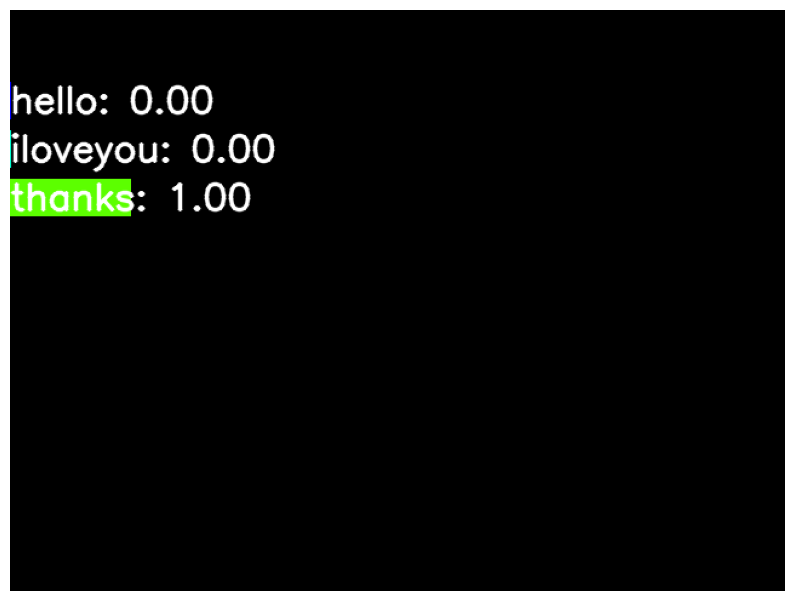

In [75]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [77]:
# 1. Detection Variables
sequence = []
sentence = []
predictions = []
threshold = 0.6

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.4
) as holistic:
    while cap.isOpened():
        # Read Feed
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw Landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Updated to match your new sequence_length of 50
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(f"Prediction probabilities: {res}")
            print(f"Predicted action: {actions[np.argmax(res)]}")
            predictions.append(np.argmax(res))

            # 3. Visualization logic
            if len(predictions) >= 10:
                recent_predictions = predictions[-10:]
                unique_predictions = np.unique(recent_predictions)
                if len(unique_predictions) == 1 and unique_predictions[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                    if len(sentence) > 5:
                        sentence = sentence[-5:]

            # Visualization Probabilities
            image = prob_viz(res, actions, image, colors)

        # Get image dimensions
        height, width, _ = image.shape

        # Display the output as subtitles
        # Define the rectangle dimensions
        rectangle_bgr = (0, 0, 0)  # Black rectangle for subtitles
        cv2.rectangle(image, (0, height - 100), (width, height), rectangle_bgr, -1)

        # Add text over the rectangle
        cv2.putText(
            image,
            ' '.join(sentence),
            (10, height - 10),  # Position text slightly above the bottom
            cv2.FONT_HERSHEY_SIMPLEX,
            3,  # Font scale
            (255, 255, 255),  # White text
            3,  # Thickness
            cv2.LINE_AA
        )

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

I0000 00:00:1731375560.982383 12124957 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1 Pro
W0000 00:00:1731375561.072812 12140435 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375561.094450 12140438 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375561.097594 12140439 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375561.097877 12140442 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731375561.098423 12140441 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disablin

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction probabilities: [0.85916346 0.10688745 0.03394919]
Predicted action: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction probabilities: [0.00289872 0.7037202  0.2933811 ]
Predicted action: iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [0.00254966 0.6711018  0.32634854]
Predicted action: iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction probabilities: [0.00184304 0.65038264 0.34777433]
Predicted action: iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [0.01278188 0.84472865 0.14248952]
Predicted action: iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [0.02555415 0.7769597  0.19748609]
Predicted action: iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction probabilities: [0.01956353 0.47046825 0.50996816]
Predicted action: thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction probabilities: [3.8472560e-04 8.7606959e-02 9.1200835e-01]
Predicted actio

In [359]:
np.expand_dims(X_test[0], axis=0).shape

(1, 50, 1662)

In [360]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[1., 0.]], dtype=float32)

In [148]:
if len(sequence) == 30:
    res = model.predict(np.expand_dims(sequence, axis=0))[0]
    print(f"Prediction probabilities: {res}")
    print(f"Predicted action: {actions[np.argmax(res)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction probabilities: [0. 0. 1.]
Predicted action: iloveyou
